In [1]:
import pandas
import numpy as np
import seaborn as sns

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [2]:
data_path = "2008.csv"
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 'Cancelled': np.uint8,
		 'Year': np.uint16, 'FlightNum': np.uint16 , 'Distance': np.uint16,
		 'UniqueCarrier': str, 'CancellationCode': str, 'Origin': str, 'Dest': str,
		 'ArrDelay': np.float16, 'DepDelay': np.float16, 'CarrierDelay': np.float16,
		 'WeatherDelay': np.float16, 'NASDelay': np.float16, 'SecurityDelay': np.float16,
		 'LateAircraftDelay': np.float16, 'DepTime': np.float16}

raw_data = pandas.read_csv(data_path, usecols=dtype.keys(), dtype=dtype)


In [3]:
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')


In [4]:
count_data = []
count_data_index = []
for i in range(0, 2400, 100):
	count_data.append(len(raw_data[(~raw_data['DepTime'].isna()) & (raw_data['DepTime'] > i) & (raw_data['DepTime'] < i + 100)].values))
	count_data_index.append(i)
	pass
print(count_data)
count_series = pandas.Series(count_data)
count_index_series = pandas.Series(count_data_index)
fig_data = pandas.concat({'time': count_index_series, 'count': count_series}, axis=1)
#fig_data['count'].hist()

[19847, 5644, 1786, 822, 3366, 147763, 430301, 421531, 439099, 423667, 421032, 434130, 414543, 426084, 408804, 400545, 424624, 421482, 391400, 378055, 278162, 243840, 113888, 43698]


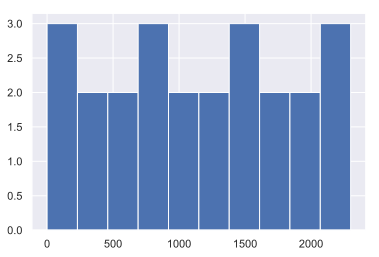

In [5]:
fig_data = pandas.concat({'time': count_index_series, 'count': count_series}, axis=0)
fig_data['time'].hist()

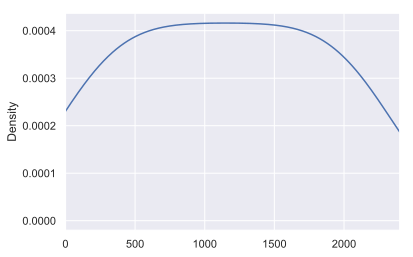

In [6]:
fig_data = pandas.concat({'time': count_index_series, 'count': count_series}, axis=1)
fig_data['time'].plot(kind='density', xlim = (0, 2400))